# Objective:

* Solve Classification Problem


* Use different algorithms


* Use different evaluation metrics

### Questions to be asked:






* What is the goal in solving the classification problem? 


* What are we attempting to predict? 


* What algorithms are to be used to build our model?


* What evaluation metrics are we using?

### Answers:
* The goal: Predict whether a loan case will be paid off or not, as well as making sure the data is cleaned i.e. fill/clear NULL, clear duplicates, format datatypes, remove unneccessary features.


* We are attempting to predict whether a customer will pay off there loan and vise-versa.


* We will use ML algorithms: **KNN, Decision Tree, SVM, Logistic Regression.**


* We will. use evaluation metrics: **Jaccard Index, F1-Score, Log-Loss, Confusion Matrix**

In [428]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [429]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'
df = pd.read_csv(path)

In [430]:
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [431]:
print(f"Count of unique Loan Status values:\n\n{df['loan_status'].value_counts()}")

Count of unique Loan Status values:

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64


In [432]:
df = df.drop(labels = ['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

# dfTree will a variable used later, while testing the accuracy of your Decision Tree 
dfTree = df

df.dtypes

loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [433]:
dfTree.head()
dfTree = dfTree.drop(['effective_date', 'due_date'], axis = 1)

In [434]:
px.histogram(df, df.loan_status, color = 'terms')

In [435]:
px.histogram(df, df.loan_status, color = 'terms')

In [436]:
print(f"Unique count per education:\n\n{df['education'].value_counts()}")
px.box(df, df.loan_status, df.age,  color = df.education, 
      title = 'Box plot per Education: Loan Status vs Age')

Unique count per education:

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64


In [437]:
df.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


In [810]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, jaccard_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x = dfTree.iloc[:, 1:5]
y = dfTree.iloc[:, 0]
print(x.nunique())
print("\n", x['education'].unique())

Principal     5
terms         3
age          32
education     4
dtype: int64

 ['High School or Below' 'Bechalor' 'college' 'Master or Above']


In [811]:
y = y.values
x = x.values

yy = preprocessing.LabelEncoder().fit(["PAIDOFF", "COLLECTION"])
xx = preprocessing.LabelEncoder().fit(["High School or Below", "Bechalor", "college", "Master or Above"])

x[:, 3] = xx.transform(x[:, 3])
y = yy.transform(y)

x = preprocessing.StandardScaler().fit_transform(x)

In [699]:
# func takes dictionary with n iterations for KEY values should be scores
'''e.g. We iterate though KNN (to find best K) -- store K in Keys()
and store predictions in Values()'''

def sorter(dict_):
    dict_ = dict(dict_)
    new = sorted(dict_.items(), key = lambda kv: kv[1], reverse = True)
    return new[0:3]

In [700]:

def quickPlot(pred1, pred2, title):
    # figsize has been hard coded to (12, 8)
    plt.figure(figsize = (12, 8))
    
    # assumption; hashtable has iterative accuracy scores in values()
    plt.plot(pred1.values(), color = 'red')
    plt.plot(pred2.values(), color = 'blue')
    
    # title is to be set by user
    plt.title(title, fontsize = 18, fontfamily = 'monospace')
    
    # fontsize & family == 18, monospace); x('Epochs'), y('Accuracy')
    plt.xlabel('Epochs', fontsize = 18, fontfamily = 'monospace')
    plt.ylabel('Accuracy', fontsize = 18, fontfamily = 'monospace')
    
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

## Model Creation and Evaluation:

### Decision Tree:

In the box's below, i will iterate through parameters 'criterion' and 'random_state' to find the best version of our Decision Tree model.

In [722]:
jaccardScore_tree = {}
f1Score_tree = {}


crit = ['gini', 'entropy', 'log_loss']  
for n in crit:
    train_x, test_x, train_y, test_y = train_test_split(
            
            x, y, test_size = .2, random_state = 13)

    
    treeNumModel = DecisionTreeClassifier(criterion = n).fit(train_x, train_y)
    
    # prediction
    treeNumYhat = treeNumModel.predict(test_x)


    jaccardScore_tree[n] = jaccard_score(test_y, treeNumYhat)

    f1Score_tree[n] = f1_score(test_y, treeNumYhat)
    

print("Best Vector(criterion, model score)\n\nJaccard----", sorter(jaccardScore_tree))
print("\nF1----", sorter(f1Score_tree))

Best Vector(criterion, model score)

Jaccard---- [('entropy', 0.7391304347826086), ('gini', 0.7246376811594203), ('log_loss', 0.7246376811594203)]

F1---- [('entropy', 0.8500000000000001), ('gini', 0.8403361344537815), ('log_loss', 0.8403361344537815)]


### Best criterion = log-loss

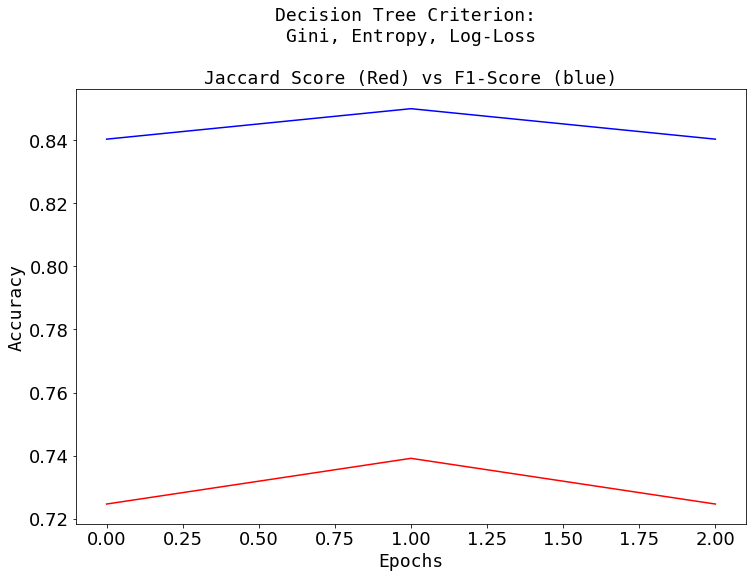

In [723]:
quickPlot(jaccardScore_tree, f1Score_tree, title = 'Decision Tree Criterion: \nGini, Entropy, Log-Loss\n\nJaccard Score (Red) vs F1-Score (blue)')

To further **optimize** our model, I will iterate through the ***random_states*** parameter, on the '**train_test_split**' algorithm -- using our now pre-defined critierion, '**log-loss**.'

In [821]:
jaccardScore_tree_v2 = {}
f1Score_tree_v2 = {}

for n in range(1, 50):
    train_x, test_x, train_y, test_y = train_test_split(
            x, y, test_size = .2, random_state = n)

    treeNumModel = DecisionTreeClassifier(criterion = 'log_loss').fit(train_x, train_y)
    # prediction
    treeNumYhat = treeNumModel.predict(test_x)

    jaccardScore_tree_v2[n] = jaccard_score(test_y, treeNumYhat)

    f1Score_tree_v2[n] = f1_score(test_y, treeNumYhat)
    
print("Best Vector(random_state, model score)\n\nJaccard----", sorter(jaccardScore_tree_v2))
print("\nF1----", sorter(f1Score_tree_v2))

Best Vector(random_state, model score)

Jaccard---- [(13, 0.7391304347826086), (11, 0.6865671641791045), (30, 0.6764705882352942)]

F1---- [(13, 0.8500000000000001), (11, 0.8141592920353983), (30, 0.8070175438596491)]


### Best random_state = 13

* Jaccard(Epochs, Accuracy) = (13, .739)


* F1(Epochs, Accuracy) = (13, .850)

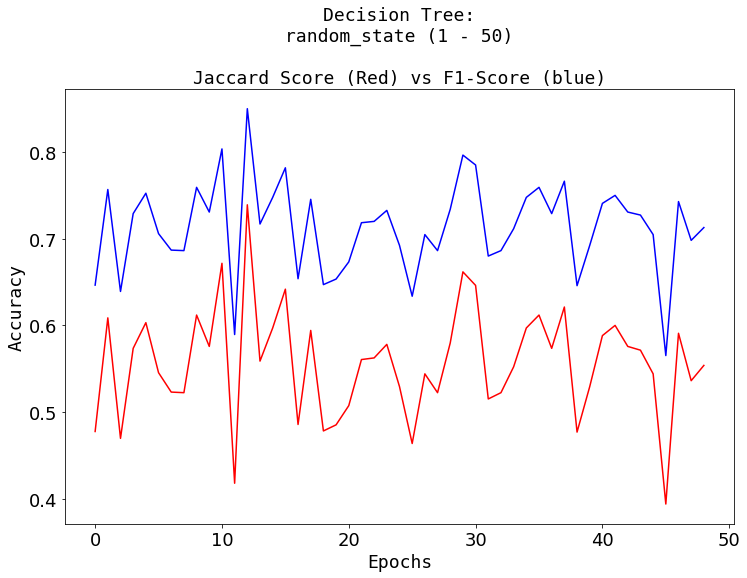

In [822]:
quickPlot(jaccardScore_tree, f1Score_tree, 
          title = 'Decision Tree:\nrandom_state (1 - 50)\n\nJaccard Score (Red) vs F1-Score (blue)')

### Final Decision Tree Model:

In [823]:
train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size = .2, random_state = 13)

treeNumModel = DecisionTreeClassifier(criterion = 'log_loss').fit(train_x, train_y)
treeNumYhat = treeNumModel.predict(test_x)

jaccard_dt_v3 = jaccard_score(test_y, treeNumYhat)

f1_dt_v3 = f1_score(test_y, treeNumYhat)

### Support Vector Machine (SVM):

In the box's below, i will iterate through parameters 'kernel' and 'random_state' to find the best version of our SVM model.

In [826]:
from sklearn.svm import SVC
jaccard_preds = {}
f1_preds = {}

kernels = ['rbf', 'linear', 'poly', 'sigmoid']
for n in kernels:
    svcModel = SVC(kernel = n).fit(train_x, train_y)
    svcYhat = svcModel.predict(test_x)

    jaccard_preds[n] = round(jaccard_score(test_y, knnYhat), 3)
    f1_preds[n] = round(f1_score(test_y, knnYhat), 3)

print(f"Kernel and Top Jaccard Score:\n{sorter(jaccard_preds)}")
print(f"\nKernel and Top F-1 Score:\n{sorter(f1_preds)}")

Kernel and Top Jaccard Score:
[('rbf', 0.814), ('linear', 0.814), ('poly', 0.814)]

Kernel and Top F-1 Score:
[('rbf', 0.898), ('linear', 0.898), ('poly', 0.898)]


### Best kernel = any (will choose rbf)

* Jaccard(Epochs, Accuracy) = (rbf, .0.7)


* F1(Epochs, Accuracy) = (rbf, .0.824)

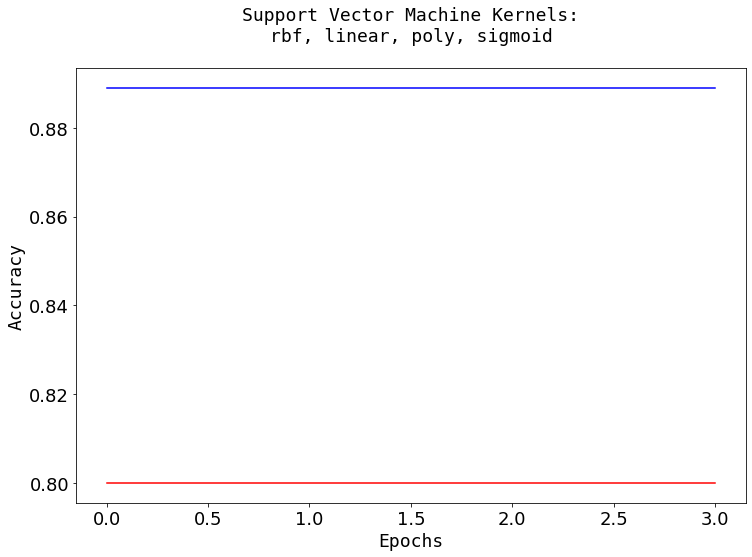

In [735]:
quickPlot(jaccard_preds, f1_preds, 
          title = 'Support Vector Machine Kernels:\nrbf, linear, poly, sigmoid\n')

In [827]:
jaccard_preds_v2 = {}
f1_preds_v2 = {}

for n in range(1, 50):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = .2, random_state = n)

    svcModel = SVC(kernel = 'rbf').fit(train_x, train_y)
    svcYhat = svcModel.predict(test_x)
    jaccard_preds_v2[n] = round(jaccard_score(test_y, svcYhat), 3)
    f1_preds_v2[n] = round(f1_score(test_y, svcYhat), 3)

print(f"Random State and Top Jaccard Score:\n{sorter(jaccard_preds_v2)}")
print(f"\nRandom State and Top F-1 Score:\n{sorter(f1_preds_v2)}")

Random State and Top Jaccard Score:
[(30, 0.857), (16, 0.843), (2, 0.829)]

Random State and Top F-1 Score:
[(30, 0.923), (16, 0.915), (2, 0.906)]


### Best random_state = 30 ---- Jaccard & F1-Score

* Jaccard(Epochs, Accuracy) = (30, 0.857)


* F1(Epochs, Accuracy) = (30, 0.923)

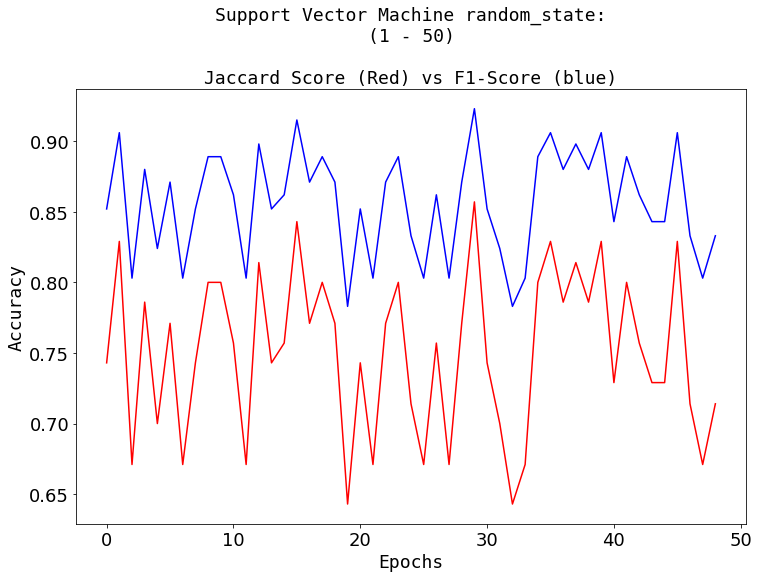

In [828]:
quickPlot(jaccard_preds_v2, f1_preds_v2, 
          title = 'Support Vector Machine random_state:\n(1 - 50)\n\nJaccard Score (Red) vs F1-Score (blue)')

### Final SVM Model:

In [816]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = .2, random_state = 30)
svcModel = SVC(kernel = 'rbf').fit(train_x, train_y)

svcYhat = svcModel.predict(test_x)

jaccard_svm_v3 = round(jaccard_score(test_y, svcYhat), 3)
f1_svm_v3 = round(f1_score(test_y, svcYhat), 3)

f1_svm_v3

0.923

### K-Neighbors (KNN):

In the box's below, i will iterate through parameters 'k' and 'random_state' to find the best version of our SVM model.

In [829]:
from sklearn.neighbors import KNeighborsClassifier as kNN

jaccard_knn = {}
f1_knn = {}
# iterate though k's to find the best fit
for k in range(1, 20):
    knnModel = kNN(k).fit(train_x, train_y)    
    knnYhat = knnModel.predict(test_x)
    
    # store different k's and their corresponding scores
    jaccard_knn[k] = round(jaccard_score(test_y, knnYhat), 3)
    f1_knn[k] = round(f1_score(test_y, knnYhat), 3)


print(sorter(jaccard_knn))
print("\n", sorter(f1_knn))

[(12, 0.725), (14, 0.725), (5, 0.721)]

 [(12, 0.84), (14, 0.84), (5, 0.838)]


### Best K = 13 ---- Jaccard & F1-Score

* Jaccard(Epochs, Accuracy) = (13, 0.87)


* F1(Epochs, Accuracy) = (13, 0.93)

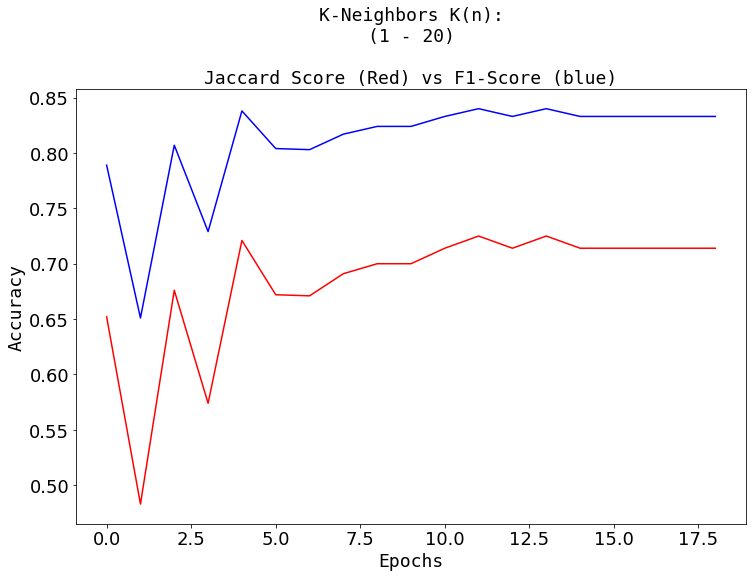

In [830]:
quickPlot(jaccard_knn, f1_knn, 
          title = 'K-Neighbors K(n):\n(1 - 20)\n\nJaccard Score (Red) vs F1-Score (blue)')

### Iterate through random_state:

In [832]:
jaccard_knn_v2 = {}
f1_knn_v2 = {}

for n in range(1, 50):
    train_x, test_x, train_y, test_y = train_test_split(
        x, y, test_size = .2, random_state = n)


    knnModel = kNN(13).fit(train_x, train_y)    
    knnYhat = knnModel.predict(test_x)
    
    # store different k's and their corresponding scores
    jaccard_knn_v2[n] = round(jaccard_score(test_y, knnYhat), 3)
    f1_knn_v2[n] = round(f1_score(test_y, knnYhat), 3)


print(sorter(jaccard_knn_v2))
print("\n", sorter(f1_knn_v2))

[(30, 0.87), (40, 0.841), (46, 0.829)]

 [(30, 0.93), (40, 0.913), (46, 0.906)]


### Best random_state = 30 ---- Jaccard & F1-Score

* Jaccard(Epochs, Accuracy) = (30, 0.87)


* F1(Epochs, Accuracy) = (30, 0.93)

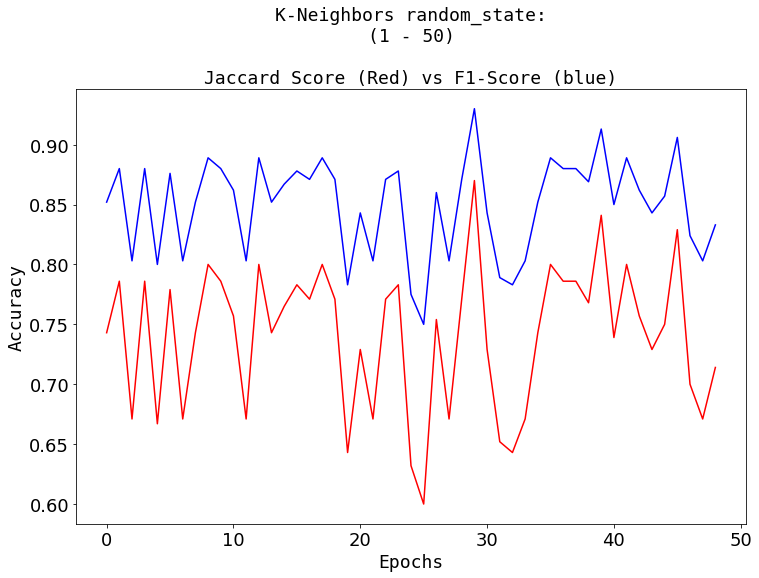

In [833]:
quickPlot(jaccard_knn_v2, f1_knn_v2, 
          title = 'K-Neighbors random_state:\n(1 - 50)\n\nJaccard Score (Red) vs F1-Score (blue)')

### Final SVM Model:

In [834]:
train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size = .2, random_state = 30)


knnModel = kNN(13).fit(train_x, train_y)    
knnYhat = knnModel.predict(test_x)
    
# store different k's and their corresponding scores
jaccard_knn_v3 = round(jaccard_score(test_y, knnYhat), 3)
f1_knn_v3 = round(f1_score(test_y, knnYhat), 3)

f1_knn_v3

0.93

### Logistic Regression (LR):

In the box's below, i will iterate through parameters 'solvers' and 'random_state' to find the best version of our LR model.

In [799]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import log_loss

jaccard_lr_v1 = {}
f1_lr_v1 = {}
logLoss_lr_v1 = {}

solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

for n in solvers:
    lrModel = LR(solver = n).fit(train_x, train_y)
  
    lrYhat = lrModel.predict(test_x)
    
    logLoss_lr_v1[n] = round(lrModel.score(test_x, test_y), 3)
    jaccard_lr_v1[n] = round(jaccard_score(test_y, lrYhat), 3)
    f1_lr_v1[n] = round(f1_score(test_y, lrYhat), 3)

print("Log-loss", sorter(logLoss_lr_v1))
print("\nJaccard", sorter(jaccard_lr_v1))
print("\nF1", sorter(f1_lr_v1))

Log-loss [('liblinear', 0.714), ('newton-cg', 0.714), ('lbfgs', 0.714)]

Jaccard [('liblinear', 0.714), ('newton-cg', 0.714), ('lbfgs', 0.714)]

F1 [('liblinear', 0.833), ('newton-cg', 0.833), ('lbfgs', 0.833)]


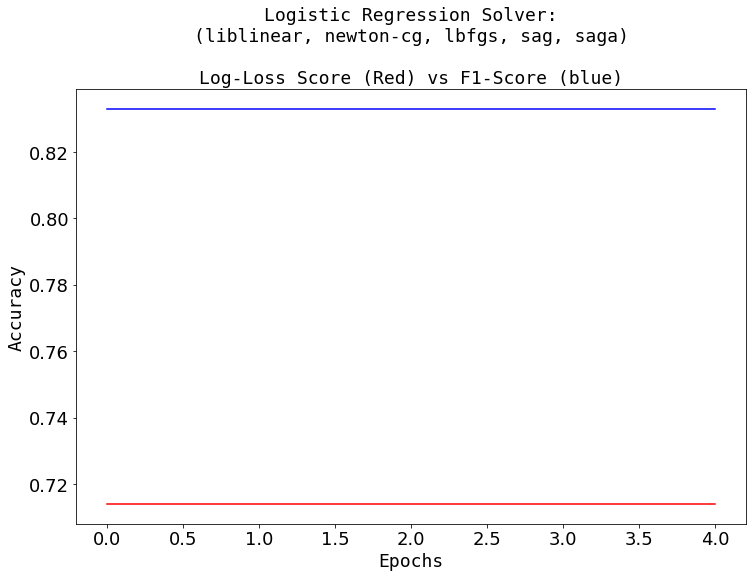

In [800]:
quickPlot(logLoss_lr_v1, f1_lr_v1, 
          title = 'Logistic Regression Solver:\n(liblinear, newton-cg, lbfgs, sag, saga)\n\nLog-Loss Score (Red) vs F1-Score (blue)')

In [803]:
jaccard_lr_v2 = {}
f1_lr_v2 = {}
logLoss_lr_v2 = {}

for n in range(1, 50):
    train_x, test_x, train_y, test_y = train_test_split(
        x, y, test_size = .2, random_state = n)
    
    lrModel = LR(solver = 'newton-cg').fit(train_x, train_y)
  
    lrYhat = lrModel.predict(test_x)
    
    logLoss_lr_v2[n] = round(lrModel.score(test_x, test_y), 3)
    jaccard_lr_v2[n] = round(jaccard_score(test_y, lrYhat), 3)
    f1_lr_v2[n] = round(f1_score(test_y, lrYhat), 3)

print("Log-loss", sorter(logLoss_lr_v2))
print("\nJaccard", sorter(jaccard_lr_v2))
print("\nF1", sorter(f1_lr_v2))

Log-loss [(30, 0.857), (16, 0.843), (2, 0.829)]

Jaccard [(30, 0.857), (16, 0.843), (2, 0.829)]

F1 [(30, 0.923), (16, 0.915), (2, 0.906)]


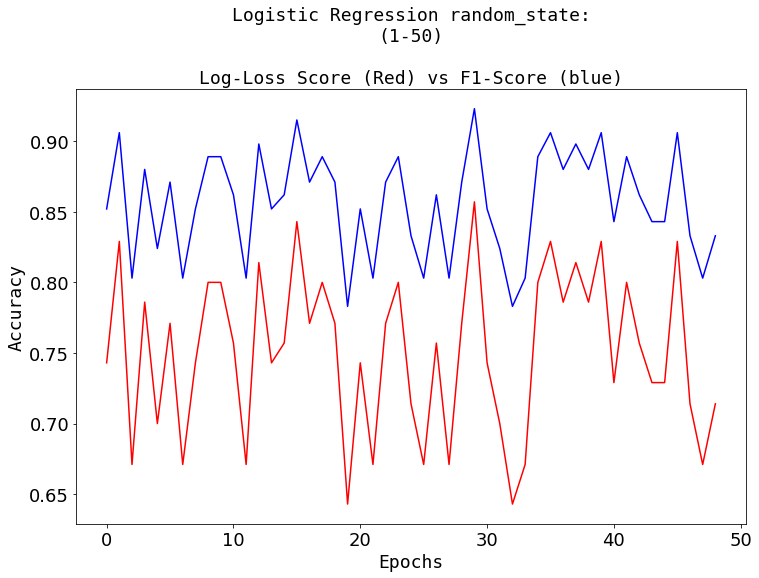

In [804]:
quickPlot(logLoss_lr_v2, f1_lr_v2, 
          title = 'Logistic Regression random_state:\n(1-50)\n\nLog-Loss Score (Red) vs F1-Score (blue)')

In [805]:
train_x, test_x, train_y, test_y = train_test_split(
     x, y, test_size = .2, random_state = 30)
    
lrModel = LR(solver = 'newton-cg').fit(train_x, train_y)
  
lrYhat = lrModel.predict(test_x)
    
logLoss_lr_v3 = round(lrModel.score(test_x, test_y), 3)
jaccard_lr_v3 = round(jaccard_score(test_y, lrYhat), 3)
f1_lr_v3 = round(f1_score(test_y, lrYhat), 3)

logLoss_lr_v3

0.857

### Dataframe Containing Algorithms and their best scores, per metric --- after iterations:

In [835]:
data = [['K-Neighbors', jaccard_knn_v3, f1_knn_v3, False], 
       ['Decision Tree', jaccard_dt_v3, f1_dt_v3, False], 
       ['Logistic Regression', jaccard_lr_v3, f1_lr_v3, logLoss_lr_v3], 
       ['SVM', jaccard_svm_v3, f1_svm_v3, False]]
evaluation_df = pd.DataFrame(data, columns = ['Algorithm', 'Jaccard-Similarity', 'F-1 Score', 'Log-Loss'])
evaluation_df

,Algorithm,Jaccard-Similarity,F-1 Score,Log-Loss
0,K-Neighbors,0.87000,0.930,False
1,Decision Tree,0.73913,0.850,False
2,Logistic Regression,0.85700,0.923,0.857
3,SVM,0.85700,0.923,False
